## Exploring proteins stored into SQLite3 Database
### This notebook was done to explore the data of biological sequences and expression level

From data previous stored in a sql database, this notebook is to explore and generate some useful graphics to support the analyzes.

In [1]:
#Import modules
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Creating a connection
con = sqlite3.Connection('biosequences.db')
# Creating a cursor - to be able to access all data
cur = con.cursor()
type(cur)

sqlite3.Cursor

In [27]:
# Select as records
cur.execute('select * from proteins')

# Get the results
all_records = cur.fetchall()

In [4]:
# Convert query result to dataframe
df = pd.DataFrame(all_records)
df.head()

,0,1,2,3,4,5,6,7,8
0,1,SB0020CVL,Bothrops jararaca,nucleotide,699,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,55.51,74.58
1,2,SB0020CVL,Bothrops jararaca,nucleotide,783,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,1.73,2.32
2,3,SB0020CVL,Bothrops jararaca,nucleotide,720,k127_NODE_8838_length_1048_cov_5093.282302_g82...,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,12054.97,16196.42
3,4,SB0020CVL,Bothrops jararaca,nucleotide,2703,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,1075.60,1445.12
4,5,SB0020CVL,Bothrops jararaca,nucleotide,459,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,22.57,30.32


In [5]:
# Renaming columns
df.columns = ['id','code','species','type_seq','seq_size','annotation','sequence','tpm','fpkm']
df.head()

,id,code,species,type_seq,seq_size,annotation,sequence,tpm,fpkm
0,1,SB0020CVL,Bothrops jararaca,nucleotide,699,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,55.51,74.58
1,2,SB0020CVL,Bothrops jararaca,nucleotide,783,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,1.73,2.32
2,3,SB0020CVL,Bothrops jararaca,nucleotide,720,k127_NODE_8838_length_1048_cov_5093.282302_g82...,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,12054.97,16196.42
3,4,SB0020CVL,Bothrops jararaca,nucleotide,2703,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,1075.60,1445.12
4,5,SB0020CVL,Bothrops jararaca,nucleotide,459,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,22.57,30.32


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
id            276 non-null int64
code          276 non-null object
species       276 non-null object
type_seq      276 non-null object
seq_size      276 non-null int64
annotation    276 non-null object
sequence      276 non-null object
tpm           276 non-null float64
fpkm          276 non-null float64
dtypes: float64(2), int64(2), object(5)
memory usage: 19.5+ KB


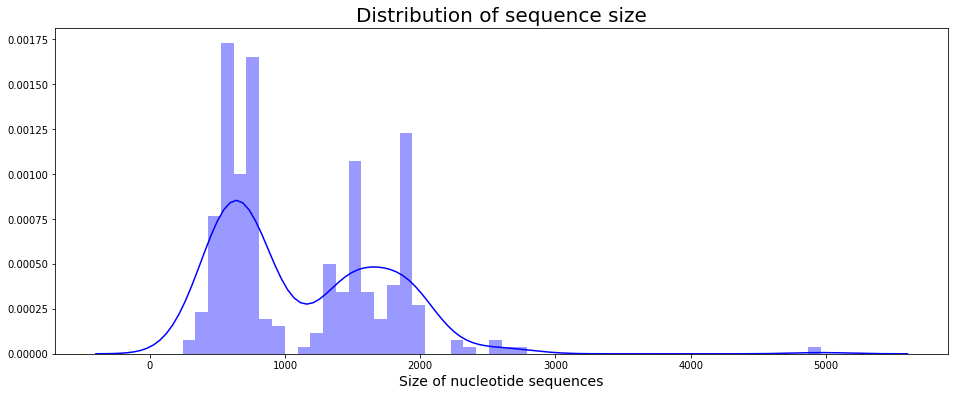

In [7]:
plt.figure(figsize=(16, 6))
fig1= sns.distplot(sorted(df.seq_size), bins=50, color='b')
plt.xlabel('Size of nucleotide sequences', size=14)
plt.title('Distribution of sequence size', size=20)
plt.show(fig1)

In [8]:
print('The average of sequence size is: {}'.format(df.seq_size.mean().round()))

The average of sequence size is: 1132.0


In [13]:
#Adicionando coluna com a identificação de cada família
lines_splited = df.annotation.str.split(pat='_')
families = []
for i in lines_splited:
    families.append(i[-1])  

df['family'] = families

In [16]:
#df = df.drop(columns="Family") delete column wrong inserted
df.head()

,id,code,species,type_seq,seq_size,annotation,sequence,tpm,fpkm,family
0,1,SB0020CVL,Bothrops jararaca,nucleotide,699,TRINITY_DN17539_c4_g1_i2.p1|117-815(+)|BJAR454...,ATGGTGCTGATCAGAGTGCTAGCAAACCTTCTGATACTACAGCTTT...,55.51,74.58,SVSP
1,2,SB0020CVL,Bothrops jararaca,nucleotide,783,comp3_seq30.p1|5195-4413(-)|BJAR454SVSP04_SVSP,ATGGTGCTGATCAGAGTACTAGCAAACCTTCTGATACTACAGCTTT...,1.73,2.32,SVSP
2,3,SB0020CVL,Bothrops jararaca,nucleotide,720,k127_NODE_8838_length_1048_cov_5093.282302_g82...,ATGATTGCCTTCATTGTCTTGCTAATTCTTGCTGCAGTGTTGCAAC...,12054.97,16196.42,CRISP
3,4,SB0020CVL,Bothrops jararaca,nucleotide,2703,cl_24411_1.p1|2793-91(-)|BJAR454DIESTER2_DIESTER,CCTGTTGTCACTTCCAGCAGTTCCTTGAGACTGGATAGTACCTCCC...,1075.60,1445.12,DIESTER
4,5,SB0020CVL,Bothrops jararaca,nucleotide,459,TRINITY_DN18143_c2_g1_i16.p3|1027-569(-)|Q90X2...,ATGCTCCCGGGTGCCAGCTTCAGGGCTGGACCCTTTGCTAACTGGG...,22.57,30.32,VEGF


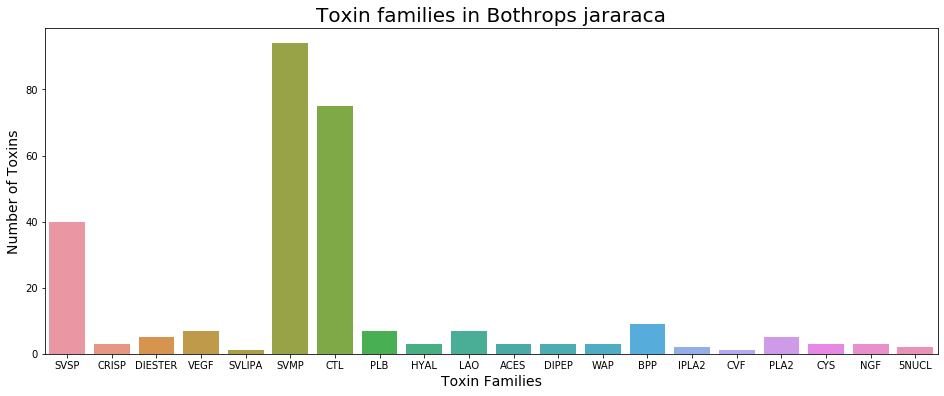

In [19]:
plt.figure(figsize=(16, 6))
cur.execute('select distinct species from proteins')
species = cur.fetchone()
fig2= sns.countplot(df.family)
plt.xlabel('Toxin Families', size=14)
plt.ylabel('Number of Toxins', size=14)
plt.title('Toxin families in {}'.format(species[0]), size=20)
plt.show(fig2)

In [20]:
df.family.value_counts()

SVMP       94
CTL        75
SVSP       40
BPP         9
LAO         7
VEGF        7
PLB         7
PLA2        5
DIESTER     5
WAP         3
CRISP       3
HYAL        3
CYS         3
NGF         3
ACES        3
DIPEP       3
IPLA2       2
5NUCL       2
SVLIPA      1
CVF         1
Name: family, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

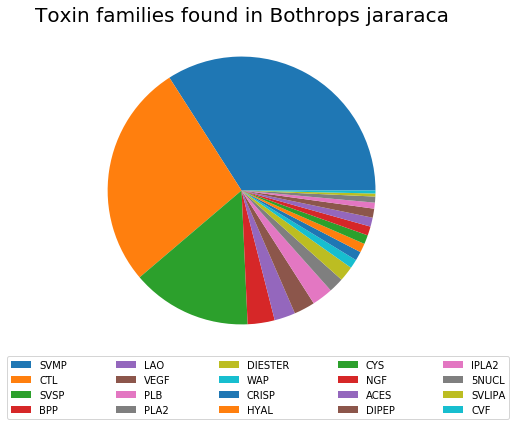

In [21]:
# Pie chart
labels = df.family.value_counts().index
plt.figure(figsize=(6,6))
fatias, texto = plt.pie(df.family.value_counts())
plt.axes().set_aspect('equal', 'datalim')
plt.legend(labels,  loc=3, ncol=5, mode="expand", borderaxespad=0., bbox_to_anchor=(-0.2, -0.2, 1.5,3))
plt.title('Toxin families found in {}'.format(species[0]), size=20)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

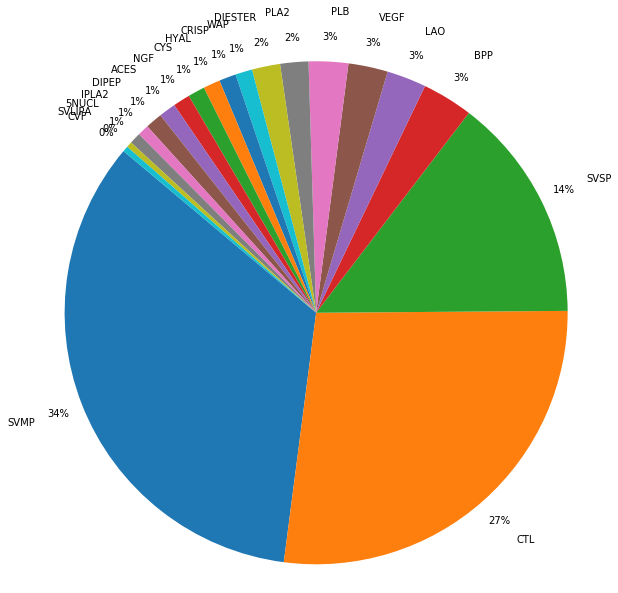

In [22]:
# Pie chart 2
labels = df.family.value_counts().index
plt.figure(figsize=(10,10))
plt.pie(df.family.value_counts(), labels=labels, autopct='%1.0f%%', startangle=140, 
                        pctdistance=1.1, labeldistance=1.2, radius=1.6)
plt.axis('equal')
plt.show

In [24]:
# Sum of expression level by toxin family
data = df.groupby(['family']).tpm.sum()
expression_sorted = data.sort_values(ascending=False)
expression_sorted

family
CTL        493810.02
SVMP       335565.03
SVSP        90657.72
CRISP       19428.80
LAO         18942.06
PLA2        18650.71
VEGF         7448.66
PLB          4202.05
BPP          3966.54
NGF          2847.95
DIESTER      1910.61
5NUCL        1154.31
WAP           489.11
HYAL          350.18
IPLA2         261.74
SVLIPA        141.35
CYS            83.80
DIPEP          59.08
CVF            20.87
ACES            9.48
Name: tpm, dtype: float64

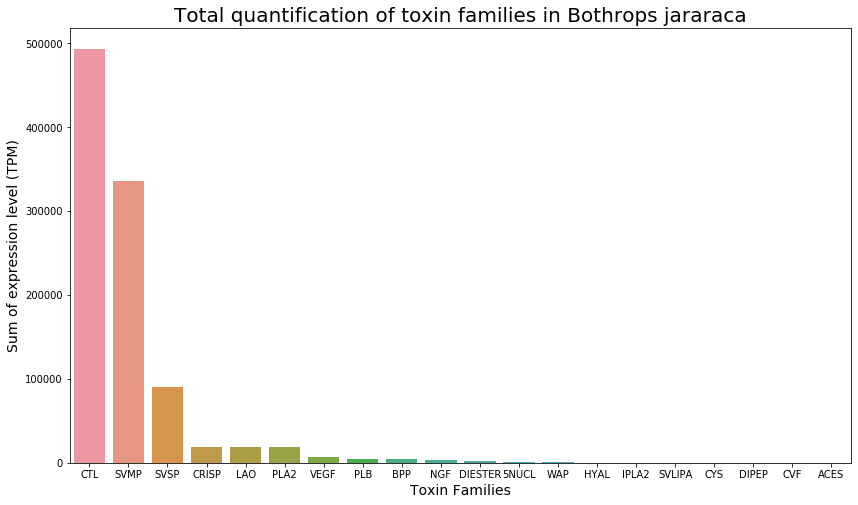

In [25]:
# Expression level by family 
plt.figure(figsize=(14,8))
sns.barplot(expression_sorted.index, expression_sorted.values)
plt.xlabel('Toxin Families', size=14)
plt.ylabel('Sum of expression level (TPM)', size=14)
plt.title('Total quantification of toxin families in {}'.format(species[0]), size=20)
plt.show()